In [18]:
from ml_theory_tools.src.ml_theory_tools.hessian import eigen
from ml_theory_tools.src.ml_theory_tools.linear_interpolation import one_dimensional_linear_interpolation
import numpy as np

In [5]:
from models import get_wide_res_net, get_dense
from data_util import get_cifar10
from torch.nn import CrossEntropyLoss
import torch
from torchvision import datasets, transforms
import torch
from datasets import CustomMNIST, CustomFMNIST, CustomCIFAR10, CustomCIFAR100
from kornia.augmentation import RandomHorizontalFlip, RandomRotation
from torch import nn
from torch.utils.data import random_split
import matplotlib.pyplot as plt

deltas = None

transform_augmented = transforms.Compose([
                            transforms.RandomHorizontalFlip(p=0.5),
                            transforms.RandomRotation(degrees=15),
                            transforms.ToTensor(),
                            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform_test = transforms.Compose([
                            transforms.ToTensor(),
                            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = CustomCIFAR10('~/.pytorch/CIFAR10_data/', download=True, train=True, transform=transform_augmented, deltas=deltas, return_index=False)
test_dataset = CustomCIFAR10('~/.pytorch/CIFAR10_data/', download=True, train=False, transform=transform_test, return_index=False)
val_subset, test_subset = random_split(test_dataset, [0.4, 0.6])
batch_size = 64

# load training set, test set 
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_subset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_subset, batch_size=batch_size, shuffle=True)

augmentation = nn.Sequential(
                RandomHorizontalFlip(p=0.5),
                RandomRotation(degrees=15)
            )

model = get_wide_res_net(16, 4, 0.3, 100)
model.load_state_dict(torch.load("experiment_results_from_eddie/cifar10_wide16/baseline/6878/final_weights.pt", weights_only=False, map_location=torch.device('cpu')))

#eigen(5, model, train_loader, CrossEntropyLoss())

Files already downloaded and verified
Files already downloaded and verified
| Wide-Resnet 16x4


<All keys matched successfully>

In [3]:
param_A = "experiment_results_from_eddie/cifar10_wide16/baseline/6878/final_weights.pt"
param_B = "experiment_results_from_eddie/cifar10_wide16/poison/train_w_poison/1996/final_weights.pt"
train_losses_cifar10w16, test_losses_cifar10w16 = one_dimensional_linear_interpolation(params_A_path=param_A, 
                                     params_B_path=param_B,
                                     model=model,
                                     loss=CrossEntropyLoss(),
                                     train_loader=train_loader,
                                     test_loader=test_loader,
                                     save_file_prefix="test1",
                                     grid_size=20)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


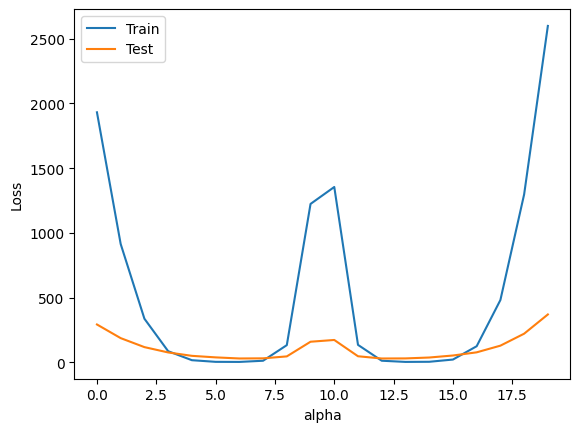

In [8]:
plt.plot(train_losses_cifar10w16, label="Train")
plt.plot(test_losses_cifar10w16, label="Test")
plt.xlabel("alpha")
plt.ylabel("Loss")
plt.legend()

In [9]:
param_A = "experiment_results_from_eddie/cifar10_dense/baseline/6842/final_weights.pt"
param_B = "experiment_results_from_eddie/cifar10_dense/poison/58658/final_weights.pt"
model = get_dense()
train_losses_cifar10d, test_losses_cifar10d = one_dimensional_linear_interpolation(params_A_path=param_A, 
                                     params_B_path=param_B,
                                     model=model,
                                     loss=CrossEntropyLoss(),
                                     train_loader=train_loader,
                                     test_loader=test_loader,
                                     save_file_prefix="test2",
                                     grid_size=20)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


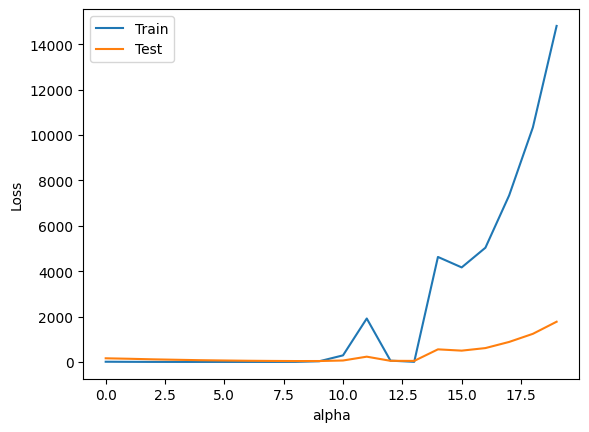

In [10]:
plt.plot(train_losses_cifar10d, label="Train")
plt.plot(test_losses_cifar10d, label="Test")
plt.xlabel("alpha")
plt.ylabel("Loss")
plt.legend()

In [11]:
param_A = "experiment_results_from_eddie/cifar10_dense/baseline/9420/final_weights.pt"
param_B = "experiment_results_from_eddie/cifar10_dense/poison/70842/final_weights.pt"
model = get_dense()
train_losses_cifar10d2, test_losses_cifar10d2 = one_dimensional_linear_interpolation(params_A_path=param_A, 
                                     params_B_path=param_B,
                                     model=model,
                                     loss=CrossEntropyLoss(),
                                     train_loader=train_loader,
                                     test_loader=test_loader,
                                     save_file_prefix="test2",
                                     grid_size=20)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


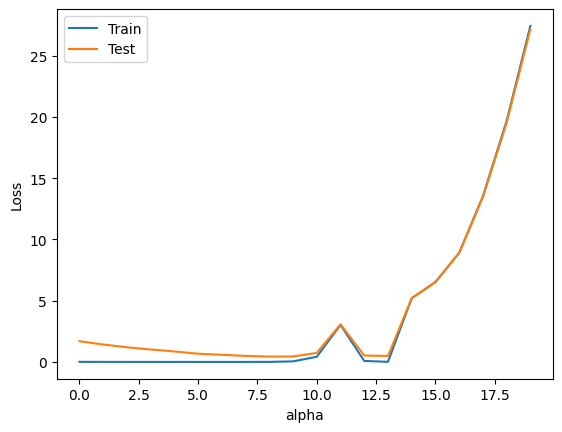

In [13]:
plt.plot([t/len(train_loader) for t in train_losses_cifar10d2], label="Train")
plt.plot([t/len(test_loader) for t in test_losses_cifar10d2], label="Test")
plt.xlabel("alpha")
plt.ylabel("Loss")
plt.legend()

In [32]:
param_A = "experiment_results_from_eddie/cifar10_dense/baseline/9420/final_weights.pt"
param_B = "experiment_results_from_eddie/cifar10_dense/poison/70842/weights.pt"
model = get_dense()
train_losses_cifar10d2_, test_losses_cifar10d2_ = one_dimensional_linear_interpolation(params_A_path=param_A, 
                                     params_B_path=param_B,
                                     model=model,
                                     loss=CrossEntropyLoss(),
                                     train_loader=train_loader,
                                     test_loader=test_loader,
                                     save_file_prefix="test2",
                                     grid_size=20)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


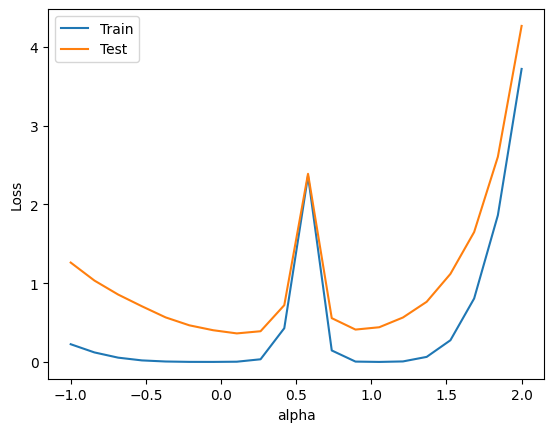

In [34]:
plt.plot(np.linspace(-1, 2, 20), [t/len(train_loader) for t in train_losses_cifar10d2_], label="Train")
plt.plot(np.linspace(-1, 2, 20), [t/len(test_loader) for t in test_losses_cifar10d2_], label="Test")
plt.xlabel("alpha")
plt.ylabel("Loss")
plt.legend()

In [35]:
param_A = "experiment_results_from_eddie/cifar10_dense/baseline/31410/final_weights.pt"
param_B = "experiment_results_from_eddie/cifar10_dense/poison/73096/weights.pt"
model = get_dense()
train_losses_cifar10d2_2, test_losses_cifar10d2_2 = one_dimensional_linear_interpolation(params_A_path=param_A, 
                                     params_B_path=param_B,
                                     model=model,
                                     loss=CrossEntropyLoss(),
                                     train_loader=train_loader,
                                     test_loader=test_loader,
                                     save_file_prefix="test2",
                                     grid_size=20)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


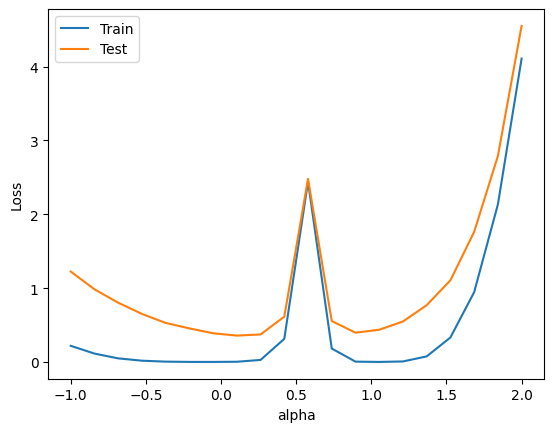

In [36]:
plt.plot(np.linspace(-1, 2, 20), [t/len(train_loader) for t in train_losses_cifar10d2_2], label="Train")
plt.plot(np.linspace(-1, 2, 20), [t/len(test_loader) for t in test_losses_cifar10d2_2], label="Test")
plt.xlabel("alpha")
plt.ylabel("Loss")
plt.legend()

In [37]:
param_A = "experiment_results_from_eddie/cifar10_dense/baseline/31410/final_weights.pt"
param_B = "experiment_results_from_eddie/cifar10_dense/poison/73096/final_weights.pt"
model = get_dense()
train_losses_cifar10d2_3, test_losses_cifar10d2_3 = one_dimensional_linear_interpolation(params_A_path=param_A, 
                                     params_B_path=param_B,
                                     model=model,
                                     loss=CrossEntropyLoss(),
                                     train_loader=train_loader,
                                     test_loader=test_loader,
                                     save_file_prefix="test2",
                                     grid_size=20)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


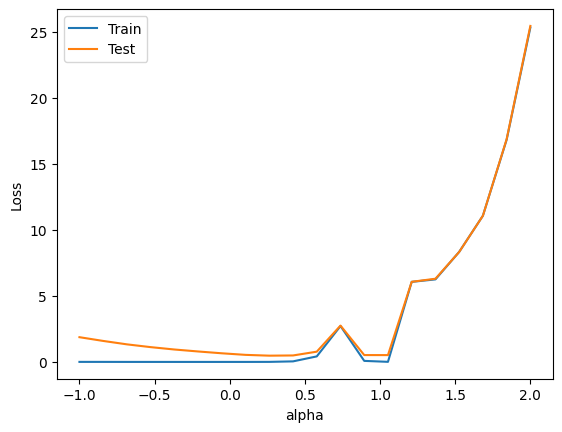

In [38]:
plt.plot(np.linspace(-1, 2, 20), [t/len(train_loader) for t in train_losses_cifar10d2_3], label="Train")
plt.plot(np.linspace(-1, 2, 20), [t/len(test_loader) for t in test_losses_cifar10d2_3], label="Test")
plt.xlabel("alpha")
plt.ylabel("Loss")
plt.legend()

In [21]:
transform_augmented = transforms.Compose([
                            transforms.RandomHorizontalFlip(p=0.5),
                            transforms.RandomRotation(degrees=15),
                            transforms.ToTensor(),
                            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform_test = transforms.Compose([
                            transforms.ToTensor(),
                            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = CustomCIFAR100('~/.pytorch/CIFAR100_data/', download=True, train=True, transform=transform_augmented, deltas=deltas, return_index=False)
test_dataset = CustomCIFAR100('~/.pytorch/CIFAR100_data/', download=True, train=False, transform=transform_test, return_index=False)
val_subset, test_subset = random_split(test_dataset, [0.4, 0.6])
batch_size = 64

# load training set, test set 
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_subset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_subset, batch_size=batch_size, shuffle=True)


Files already downloaded and verified
Files already downloaded and verified


In [22]:
param_A = "experiment_results_from_eddie/cifar100_wide16/baseline/19970/final_weights.pt"
param_B = "experiment_results_from_eddie/cifar100_wide16/poison/train_w_poison/16082/final_weights.pt"
model = get_wide_res_net(16, 4, 0.3, 100)
train_losses_cifar100w16, test_losses_cifar100w16 = one_dimensional_linear_interpolation(params_A_path=param_A, 
                                     params_B_path=param_B,
                                     model=model,
                                     loss=CrossEntropyLoss(),
                                     train_loader=train_loader,
                                     test_loader=test_loader,
                                     save_file_prefix="test2",
                                     grid_size=20)

| Wide-Resnet 16x4
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


[5683.35604954 3854.65407395 2134.84569812  914.66360354  264.84570457
   53.76873513   21.93517222   73.48082906  867.7023074  3400.90021539
 3375.61587262  854.67889249   69.36468483   22.01632858   48.37020874
  251.00144423  911.09818906 2202.74394166 3937.69435644 5716.36069965]


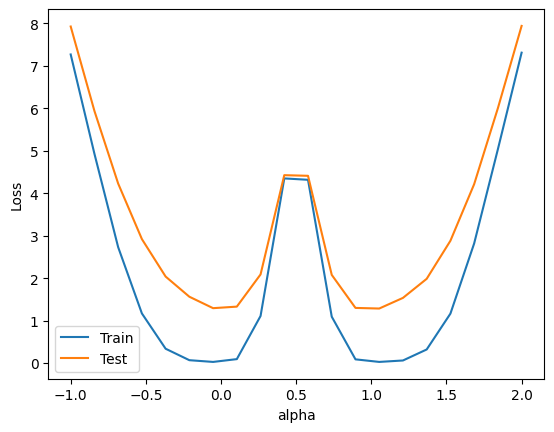

In [23]:
print(train_losses_cifar100w16)
plt.plot(np.linspace(-1, 2, 20), [t/len(train_loader) for t in train_losses_cifar100w16], label="Train")
plt.plot(np.linspace(-1, 2, 20), [t/len(test_loader) for t in test_losses_cifar100w16], label="Test")
plt.xlabel("alpha")
plt.ylabel("Loss")
plt.legend()

In [28]:
train_dataset = CustomCIFAR10('~/.pytorch/CIFAR10_data/', download=True, train=True, transform=transform_augmented, deltas=deltas, return_index=False)
test_dataset = CustomCIFAR10('~/.pytorch/CIFAR10_data/', download=True, train=False, transform=transform_test, return_index=False)
val_subset, test_subset = random_split(test_dataset, [0.4, 0.6])
batch_size = 64

# load training set, test set 
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_subset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_subset, batch_size=batch_size, shuffle=True)

model = get_wide_res_net(16, 4, 0.3, 100)

Files already downloaded and verified
Files already downloaded and verified
| Wide-Resnet 16x4


In [25]:
param_A = "experiment_results_from_eddie/cifar10_wide16/baseline_aug/10417/final_weights.pt"
param_B = "experiment_results_from_eddie/cifar10_wide16/poison_aug/8172/final_weights.pt"
train_losses_cifar10w16, test_losses_cifar10w16 = one_dimensional_linear_interpolation(params_A_path=param_A, 
                                     params_B_path=param_B,
                                     model=model,
                                     loss=CrossEntropyLoss(),
                                     train_loader=train_loader,
                                     test_loader=test_loader,
                                     save_file_prefix="test1",
                                     grid_size=20)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


[5683.35604954 3854.65407395 2134.84569812  914.66360354  264.84570457
   53.76873513   21.93517222   73.48082906  867.7023074  3400.90021539
 3375.61587262  854.67889249   69.36468483   22.01632858   48.37020874
  251.00144423  911.09818906 2202.74394166 3937.69435644 5716.36069965]


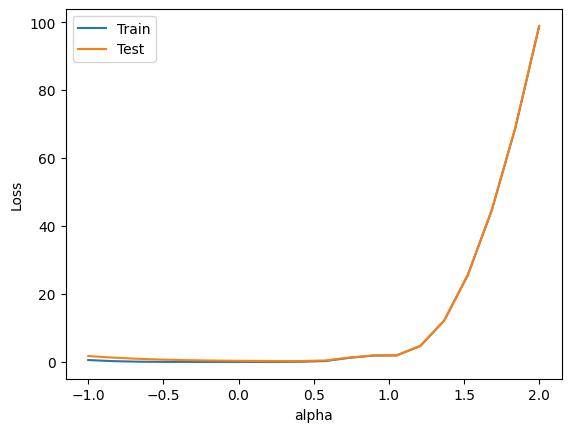

In [26]:
print(train_losses_cifar100w16)
plt.plot(np.linspace(-1, 2, 20), [t/len(train_loader) for t in train_losses_cifar10w16], label="Train")
plt.plot(np.linspace(-1, 2, 20), [t/len(test_loader) for t in test_losses_cifar10w16], label="Test")
plt.xlabel("alpha")
plt.ylabel("Loss")
plt.legend()

In [31]:
param_A = "experiment_results_from_eddie/cifar10_wide16/baseline_aug/10417/final_weights.pt"
param_B = "experiment_results_from_eddie/cifar10_wide16/poison_aug/8172/weights.pt"
train_losses_cifar10w16_aug_2, test_losses_cifar10w16_aug_2 = one_dimensional_linear_interpolation(params_A_path=param_A, 
                                     params_B_path=param_B,
                                     model=model,
                                     loss=CrossEntropyLoss(),
                                     train_loader=train_loader,
                                     test_loader=test_loader,
                                     save_file_prefix="test1",
                                     grid_size=20)

0


RuntimeError: The size of tensor a (16) must match the size of tensor b (24) at non-singleton dimension 0